## Feature Analysis

### Importing Libraries

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

import os, sys, warnings
warnings.filterwarnings("ignore")
sys.path.append("/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate")
import defaults

### Loading Features

In [2]:
def Extract_Low_Level_Features(
	features_names:list
):
	"""
	Extracting low-level features from videos.
	"""
	# Loading Low-Level Features
	df = pd.read_csv(os.path.join(defaults.llf_features_path))
	filenames = df.loc[:, "filename"].to_numpy()
	if features_names == None:
		Results = df.loc[:, ~df.columns.isin(['filename', 'GLCM_compute_time', 'TC_compute_time', "SI_compute_time", "TI_compute_time", "CTI_compute_time", "CF_compute_time", "CI_U_compute_time", "CI_V_compute_time", "EhL_Y_compute_time", 'EhL_U_compute_time', "EhL_V_compute_time"])].to_numpy()
	else:
		Results = df.loc[:, features_names].to_numpy()
	Results = np.round(Results, decimals=6)

	features = {}
	for i,filename in enumerate(filenames):
		features[filename] = np.round(Results[i], decimals=3)
			
	return features

### SI vs TI

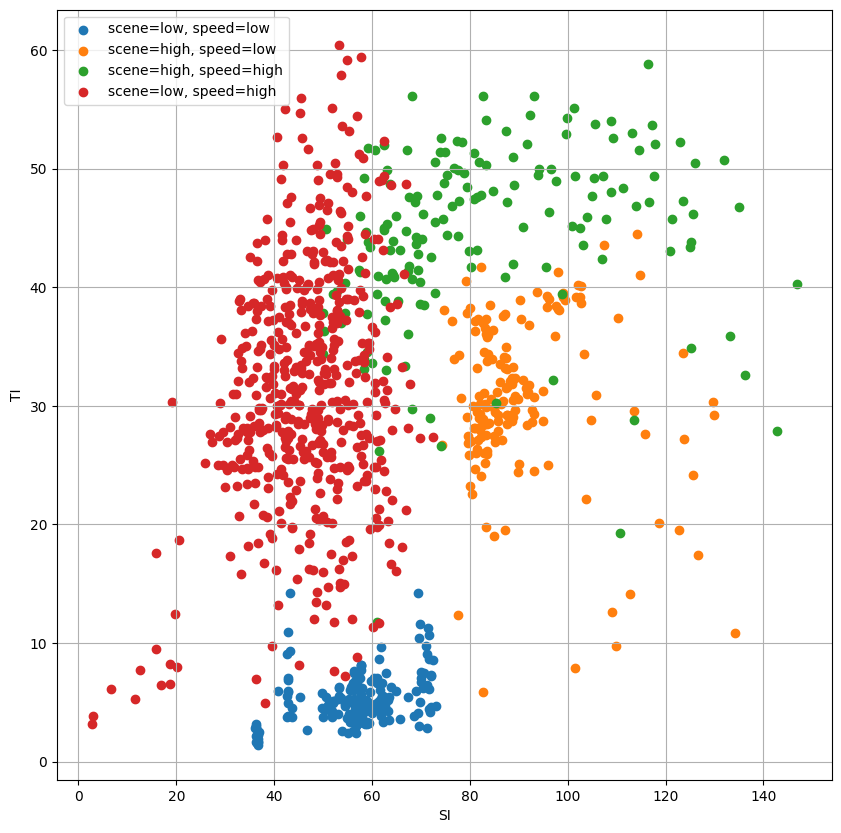

In [3]:
# Loading Features
features = Extract_Low_Level_Features(features_names=["mean_SI_mean", "mean_TI_std"])

# Plotting Figure
plt.figure(figsize=(10,10))
plt.grid()
plt.xlabel('SI')
plt.ylabel("TI")

Data = [[],[],[],[]]

for key, value in features.items():
    flight_num = int(key.split("_")[0].split("t")[-1])
    
    index = (flight_num-1)//12
    Data[index].append(list(value))


for i in range(4):
    data = np.asarray(Data[i])
    if i == 0 or i == 3:
        plt.scatter(data[:,0], data[:,1], label="scene=low, speed={}".format("low" if i==0 else "high"))
    else:
        plt.scatter(data[:,0], data[:,1], label="scene=high, speed={}".format("low" if i==1 else "high"))

plt.legend()
plt.show()

### PCA

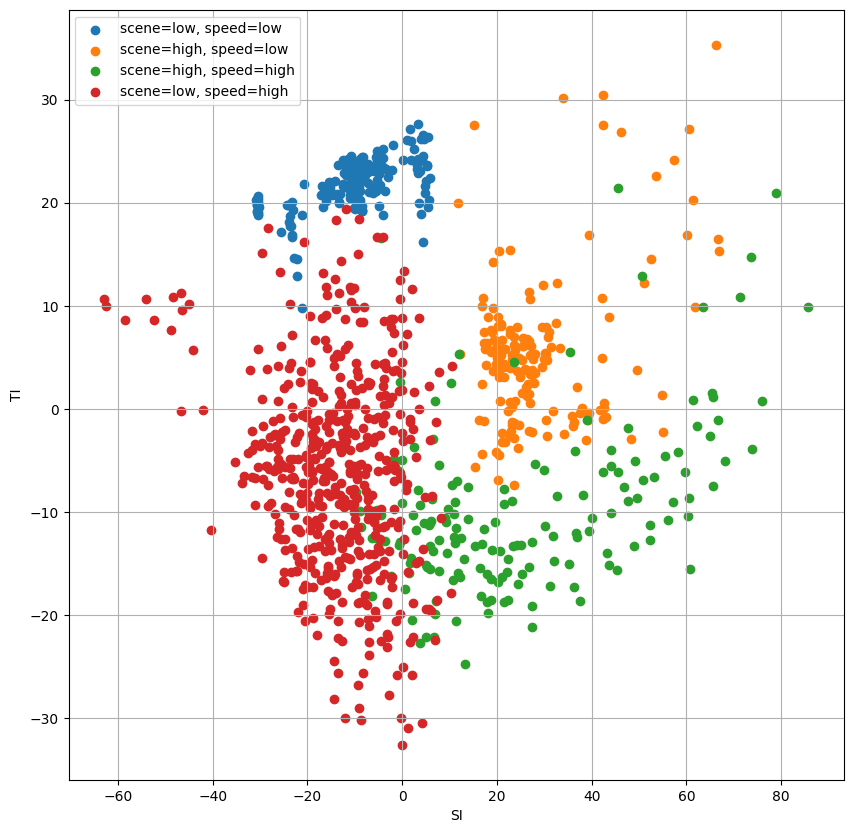

In [4]:
# Loading Features
features = Extract_Low_Level_Features(features_names=["mean_SI_mean", "mean_TI_std"])

# Plotting Figure
plt.figure(figsize=(10,10))
plt.grid()
plt.xlabel('SI')
plt.ylabel("TI")

Data = [[],[],[],[]]

for key, value in features.items():
    flight_num = int(key.split("_")[0].split("t")[-1])
    
    index = (flight_num-1)//12
    Data[index].append(list(value))

pca = PCA(n_components=2)
pca.fit(np.concatenate(Data, axis=0))

for i in range(4):
    data = pca.transform(np.asarray(Data[i]))
    if i == 0 or i == 3:
        plt.scatter(data[:,0], data[:,1], label="scene=low, speed={}".format("low" if i==0 else "high"))
    else:
        plt.scatter(data[:,0], data[:,1], label="scene=high, speed={}".format("low" if i==1 else "high"))

plt.legend()
plt.show()